## Chapter 3. Statistial Experiments and Significance Testing(통계적 실험과 유의성 검점)

In [1]:
# 라이브러리 불러오기
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [2]:
import os
os.chdir('C:\\Users\\my\\Desktop')

## A/B 검정
두가지 처리 방법, 제품, 절차 중 어느 쪽이 다른 쪽보다 더 우월하다는 것을 입증 하기 위해 실험군을 두 그룹으로 나누어 진행하는 실험  
두가지 처리방법 중 하나는 기준이 되는 기존방법이거나 아예 아무런 처리도 적용하지 않은 방법이 된다. 이를 대조군이라고 한다.   

## 가설검정 & 유의성 검정 
관찰된 효과가 우연에 의한 것인지 여부를 알아내는 것  
* 귀무가설 : 우연 때문이라는 가설 
* 대립가설 : 귀무가설과의 대조 (증명하고자 하는 가설 )
* 일원검정 : 한 방향으로만 우연히 일어날 확률을 계산하는 가설검정
* 이원검정 : 양 방향으로만 우연히 일어날 확률을 계산하는 가설검정

## Resampling (재표본추출 )
랜덤한 변동성을 알아보자는 일반적인 목표를 가지고 ,관찰된 데이터의 값에서 표본을 반복적으로 추출하는 것을 의미    

## Permutation test (순열검정)
재표본추출 순열검정 이는 A와 B그룹의 결과를 섞어서 비슷한 크기의 그룹들을 반복적으로 만든 다음 관찰된 차이를 각 경우에서 발생되는 차이와 비교했을 때 얼마나 극닥적인지 관찰하는 방법   

순열검정 절차  
 1. 여러그룹의 결과를 단일 데이터 집합으로 결합
 2. 결합된 데이터를 잘 섞은 후, 그룹A와 동일한 크기의 표본을 무작위로 추출한다.
 3. 나머지 데이터에서 그룹 B와 동일한 크기의 샘플을 무작위로 추출한다.
 4. C,D 등의 그룹에 대해서도 동일한 작업을 수행, 원본표본의 크기를 반영하는 재표본을 수집한다.
 5. 원래 샘플에 대해 구한 통계량 또는 추정치가 무엇이었든 간에 지금 추출한 재표본에 대해 모두 다시 계산하고 기록한다. 
 6. 앞선 단계들을 R번 반복하여 검정통계랑의 순열분포를 얻는다.

In [3]:
session_times = pd.read_csv("data/web_page_data.csv")
session_times.Time = 100 * session_times.Time

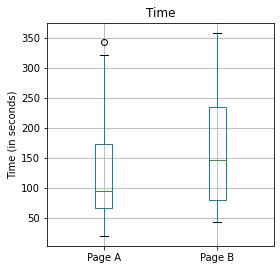

In [4]:
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [5]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


In [6]:
# 순열검정 
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

16.695238095238096


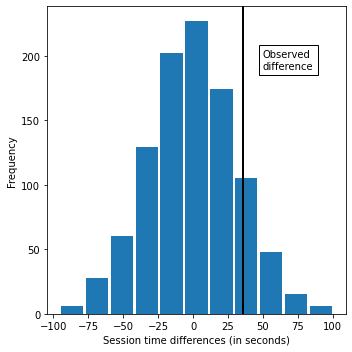

In [7]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2) # plt.axvline()로 세로선을 그릴 수 있다
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print(np.mean(perm_diffs > mean_b - mean_a))
# 0.121

## Statistical Significance and P-Values(통계적 유의성과 P값)
통계적 유의성이란, 통계학자가 자신의 실험결과가 우연히 일어난 것인지, 아니면 우연히 일어날 수 없는 극단적인 것인지를 판단하는 방법  
결과가 우연히 벌어질 수 있는 변동성의 바깥에 존재한다면 우리는 이것을 통계적으로 유의하다고 말한다.  

P값 - 귀무가설을 구체화한 기회모델이 주어졌을때 관측된 결과와 같이 특이하거나 극단적인 결과를 얻을 확률  
알파 - 실제결과가 통계적으로 의미 있는 것으로 간주되기 위해 우연에 의한 결과가 능가해야 하는 비정상적인 가능성의 임계확률  

> 제1종오류 - 우연에 의한 효과를 실제효과라고 잘못 결론내리는것  
  제2종오류 - 실제효과를 우연에 의한 효과라고 잘못 결론내리는것

In [8]:
pd.DataFrame(data = [[200,182],[23539,22406]], columns = ["PriceA", "PriceB"], index = ["conversion"," no conversion "])

,PriceA,PriceB
conversion,200,182
no conversion,23539,22406


A가 B보다 5%정도 우수한 결과를 보였다. 재표본추출절차를 사용하여 A와 B간의 전환차이가 우연에 의한 것인지 검정  
우연에 의한 차이란 곧 두 전환율 사이에 차이가 없다는 귀무가설의 확률모형을 가지고 생성한 데이터의 랜덤변이를 의미

Observed difference: 0.0368%


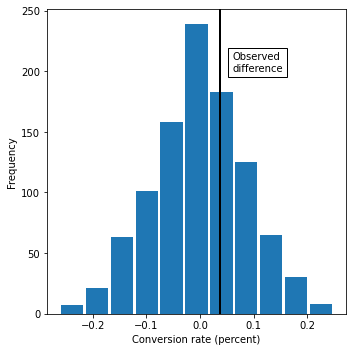

In [9]:
random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### P-Value 
P값을 통해 전달하고자 하는 의미는 결과가 우연에서 비롯될 확률  
실제 P값이 나타내는 것은 랜덤모텔이 주어졌을때 그 결과가 관찰된 결과보다 더 극단적일 확률  

유의수준 - 0.05 , 0.03, 0.01 (숫자가 작을 수록 엄격) , 유의확률이 P와 비교

In [10]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs])) # 참은 1, 거짓은 0 

0.332


p값은 0.332이다. 우연히 얻은 결과의 30%정도가 관찰한 것과 비슷한 정도로 예외적인 결과를 얻을 것으로 기대된다.  

In [11]:
#가설이 이항분포를 따르기 때문에 순열검정 없이 P값 근사 
#근사를 위해 stats.chi2_contingency 사용

survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


## t-Tests ( t-검정)
두집단의 평균차이를 검증하기 위한 분석방법   
독립변수 - 정성적변수(명목, 서열척도)  
종속변수 - 정량적변수(등간, 비율척도)

In [12]:
# 척도에 무관하게 t분포를 사용하려면 표준화된 검정통계량을 사용해야한다. 
# stats.ttest_ind 

res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False) # equl_var 두 집단의 variance가 같은지, 다른지를 측정
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [13]:
tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time, 
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller') # alternative는 대립가설 정의 , ‘two-sided’‘less’: one-sided ‘greater’: one-sided
print(f'p-value: {pvalue:.4f}')

p-value: 0.1408


오버피팅(잡음까지 피팅) - 추가하는 변수가 많을수록 또는 더 많은 모델을 사용할 수록 뭔가 우연에 의해 유의미한 것으로 나타날 확률이 커진다.

자유도- 표본데이터에서 계산된 통계량에 적용되며 변화가 가능한 값들의 개수를 나타낸다.

## ANOVA
여러그룹간의 유의미한 차이를 검정하는 통계적 절차를 분산분석 줄여서 ANOVA라고 한다.  
쌍별비교(pairwise comparison) : 여러 그룹중 두 그룹간의 가설검정  
총괄검정(omnibus test) : 여러그룹 평균들의 전체 분산에 관한 단일 가설검정  
분산분해(decomposition of variance): 구성요소 분리 , 예를 들면 전체평균, 처리평균, 잔차 오차로부터 개별 값들에 대한 기여를 뜻한다.  
F-통계량 : 그룹평균간의 차이가 랜덤모델에서 예상되는 것에서 벗어나는 정도를 측정하는 표준화된 통계량, 잔차오차(residual error)로 인한 분산과 그룹평균의 분산에 대한 비율을 기초로 한다. 이 비율이 높을 수록 통계적으로 유의미  
SS(sum of sqare) :  어떤 평균으로부터의 편차들의 제곱합  

In [14]:
four_sessions = pd.read_csv('data/four_sessions.csv')
four_sessions.head(3)

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175


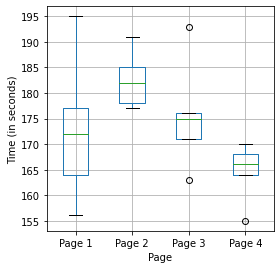

In [15]:
ax = four_sessions.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

1page와 2page, 1page와 3page....etc 등 한쌍식 비교하는 횟수가 증가할 수록 우연히 일어난 일에 속을 가능성이 커진다.   
#### ANOVA를 이용해 검정 필요   
모든 데이터를 한상자에 모은다.  
5개의 값을 4개의 재표본을 섞어서 추출  
각 그룹의 평균을 기록  
네 그룹 평균 사이의 분산을 기록   
2~4단계를 여러 번 반복  

In [16]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel()) # ravel함수는 np함수로써, 여러행렬의 함수를 하나의 행,열로 변환을 해주는 함수
print('Variance:', observed_variance)
# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values) # np.random.permutation 무작위로 섞인 배열을 만든다.
    return df.groupby('Page').mean().var()[0]
    
print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
29.37333333333325


In [17]:
model = smf.ols('Time ~ Page', data = four_sessions).fit()

avo_table = sm.stats.anova_lm(model)
avo_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


Pr(Prob) 0.07233333333333333


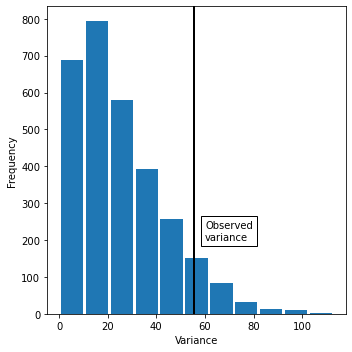

In [18]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## F-Statistic(F통계량)
F통계량은 잔차오차로 인한 분산과 그룹평균의 분산에 대한 비율을 기초로 한다. 이 비율이 높을 수록 통계적으로 유의미하다고 할 수 있다. 데이터가 정류분포를 따를 경우 , 통계 이론에 따르면 해당 통계량은 특정 분포를 따르게 되어 있다.

In [19]:
model = smf.ols('Time ~ Page', data=four_sessions).fit() 
                
aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


DF자유도 , sum_sq제곱합, mean_sq평균제곱, F value F통계량

In [20]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time, 
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')

F-Statistic: 1.3699
p-value: 0.0388


## Chi-Square Test(카이제곱검정)
횟수관련 데이터에 주로 사용되며 예상되는 분포에 얼마나 잘 맞는지를 검정한다. 통계적 관행에서 카이제곱통계량은 일반적으로 변수 간 독립성에 대한 귀무가설이 타당한지를 평가하기 위해 r x c 분할표를 함께 사용한다.  

카이제곱통계량 - 기댓값으로부터 어떤 관찰값까지의 거리를 나타내는 측정치  
기댓값-  어떤 가정(보통 귀무가설)으로부터 데이터가 발생할 때 , 그에 대해 기대하는 정도  

피어슨 잔차 - R = (관측값 / 기댓값) / 루트 기댓값 , R은 실제횟수와 기대한 횟수 사이의 차이를 나타낸다.

### Chi-Square Test: A Resampling Approach

In [21]:
click_rate = pd.read_csv("data/click_rates.csv")
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
print(clicks)

Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988


세가지 헤드라인 비교   
재표본추출을 통해 클릭률이 우연히 발생할 수 있는 것보다 유의미한 정도로 큰 것인지를 검정, 클릭의 기대분포계산   
이 경우 각 헤드라인 모두가 동일한 클릭률을 갖는다는 가정이 귀무가설 

In [22]:
row_average = clicks.mean(axis=1)
pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [25]:
box = [1] * 34
box.extend([0] * 2966)  # 
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        
        #피어슨 잔차 - R = (관측값 / 기댓값) / 루트 기댓값 , R은 실제횟수와 기대한 횟수 사이의 차이를 나타낸다.
        pearson_residuals.append([(observe - expect) ** 2 / expect 
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.5000


In [26]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


## Fisher's Exact Test
관찰된 결과가 얼마나 극단적으로 발생할 수 있는지를 정확하게 결정하는 절차를 제공   
파이썬에서 수행하기 위해서는 2 X 2 metrices 이여야 한다.

## Multi-armed bandit(MAB)
실험설계에 대한 정통적인 통계적 접근 방식보다 명시적인 최적화와 좀 더 빠른 의사결정을 가능하게 하며 여러 테스트 특히 웹테스트를 위해 사용 

### Power and Sample Size(표본크기)  
필요한 표본크기의 계산과 관련한 중요요소  - 표본크기, 탐지하고자하는 효과크기, 가설검정을 위한 유의수준, 검정력  

statmodels 패키지에서 proportion_effectsize를 사용하여 효과크기를 계산하고 표본크기를 구하기 위해 TTestIndPower를 사용

In [29]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.393


In [30]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408
